In [5]:
# execfile ("D:/measuring/analysis/scripts/setup_analysis.py")

import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from analysis.lib.sim import electron_nuclear_sim2 as nsc; reload(nsc)


<module 'analysis.lib.sim.electron_nuclear_sim2' from 'analysis/lib/sim/electron_nuclear_sim2.pyc'>

## Microwave Pi pulse fidelities

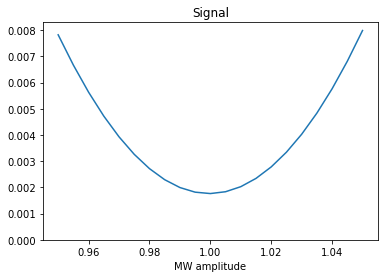

Min sig.  0.00176510750963  at  1.0


In [12]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=180e-9,carbon_params = [],inc_nitrogen=True,pulse_shape='Hermite')
fids = nsc.sweep_MW_amp(NVsys,N=1,amp_range=np.arange(0.95,1.05,0.005))

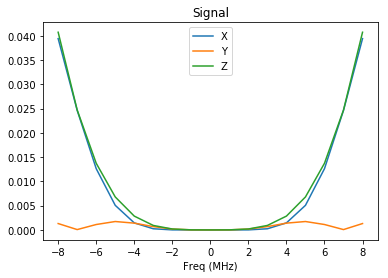

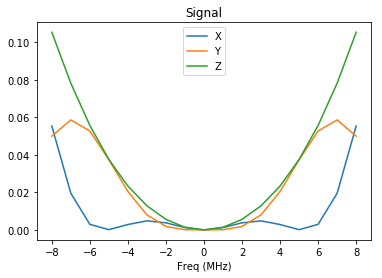

In [48]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,carbon_params = [],inc_nitrogen=False,pulse_shape='Hermite')
fids = nsc.mw_pulse_fid(NVsys)

def  modified_gaussian_envelope(t,duration):
    T_herm = 0.1667*duration
    return (1 - 0.667 * ((t- duration/2)/T_herm)**2) * np.exp(-((t - duration/2)/T_herm)**2)
NVsys.gaussian_envelope = modified_gaussian_envelope
fids = nsc.mw_pulse_fid(NVsys)

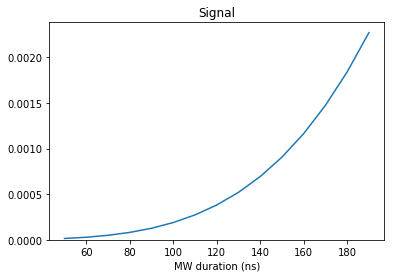

In [146]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,carbon_params = [],inc_nitrogen=True,pulse_shape='Hermite')
fids = nsc.sweep_MW_duration(NVsys,N=1)

### Monte Carlo

Infidelity is 0.022151 \pm 0.002301


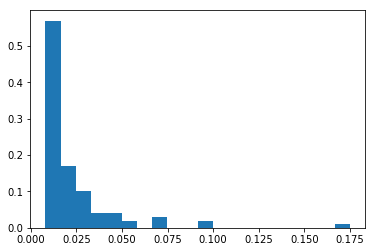

In [356]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,carbon_params = [],inc_nitrogen=True,pulse_shape='Hermite')
infids = nsc.MonteCarlo_MWFid(NVsys,sigma=0.01,mean=1.0,N_rand=100)

plt.figure()
weights = np.ones_like(infids)/len(infids)
plt.hist(infids,bins = 20, weights = weights)
plt.show()
plt.close()

## Dark ESR

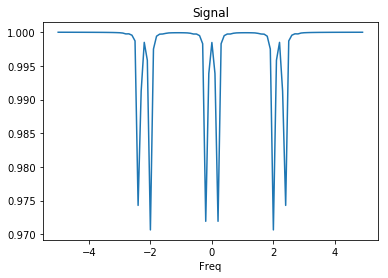

In [55]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=10000e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='square',scheme="simple")
dd = nsc.dark_esr(NVsys)

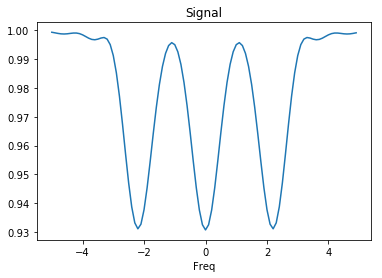

In [69]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=1000e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='square',scheme="simple")
dd = nsc.dark_esr(NVsys)

## E ramsey / Hahn echo

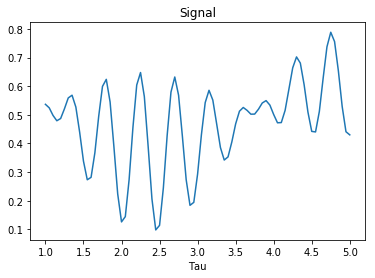

In [151]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration = 500e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')

dd = nsc.e_ramsey(NVsys)

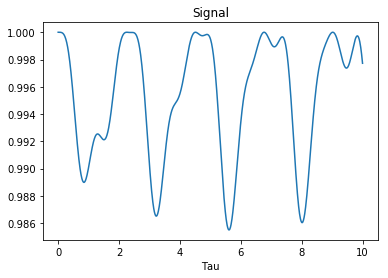

Min sig.  0.985505956427  at  5.61


In [129]:
reload(nsc)
NVsys = nsc.NV_system(use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')

dd = nsc.hahn_echo(NVsys)

## Dynamical decoupling

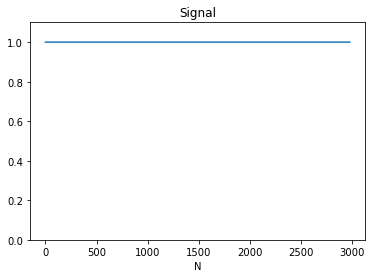

In [139]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,mw_amp=1.0,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')
# NVsys = nsc.NV_system(carbon_params = [],inc_nitrogen=True,scheme="XY8")

dd = nsc.dynamical_decouple(NVsys,scheme="XY8")


## C13 Fingerprint

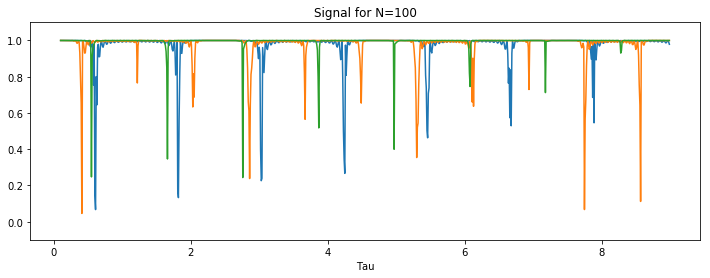

15.8111100197


In [131]:
reload(nsc)
import time 

NVsys = nsc.NV_system(use_hf_library = True,B_field = 400.0)
nsc.C13_fingerprint(NVsys,N=100,tau_range =  np.arange(0.1e-6,9e-6,1e-8),calc_indiv=True,quick_calc = False)


## Prepare X, and measure XY

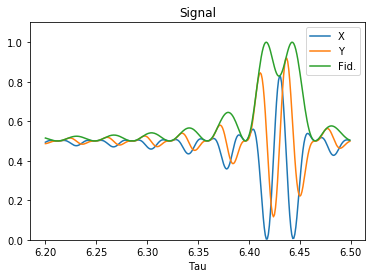

Max fid.  0.999811861503  at  6.417


In [137]:
from analysis.lib.sim import electron_nuclear_sim2 as nsc; reload(nsc)

NVsys = nsc.NV_system(use_hf_library = True)
nsc.prepare_X_and_measure_XY(NVsys,tau_range =  np.arange(6.2e-6,6.5e-6,1e-9),meas='eXY')

### Finite pulse durations

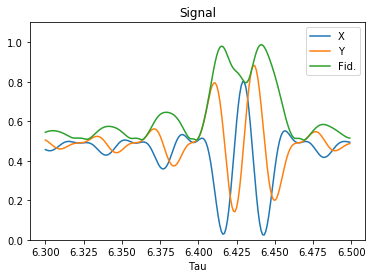

Max fid.  0.987323851052  at  6.441


In [72]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,mean_amp=0.99,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')

# nsc.C13_fingerprint(NVsys,N=32,tau_range =  np.arange(6.1e-6,6.7e-6,2e-9),quick_calc = False)
nsc.prepare_X_and_measure_XY(NVsys,tau_range =  np.arange(6.3e-6,6.5e-6,1e-9),meas='eXY')

### Prepare and measure monte carlo fidelities

Fidelity is 0.986394 \pm 0.020708


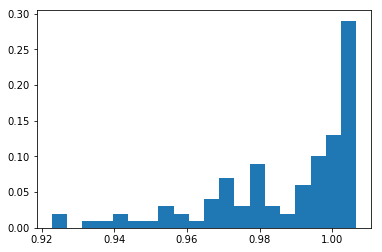

In [84]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')
infids = nsc.MonteCarlo_MWAmp_CGate_fid(NVsys,tau=6.442e-6,sigma=0.01,mean=1.0, meas = 'eXY')

plt.figure()
weights = np.ones_like(infids)/len(infids)
plt.hist(infids,bins = 20, weights = weights)
plt.show()
plt.close()